In [1]:
#########
# Correlation tests, between:
# changes in MVPA and the changes in a range of selected dependant variables
# see Table 4 and  S4

In [2]:
##############################
import pandas as pd
pd.__version__
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pingouin as pg
from pingouin import pairwise_ttests, read_dataset
from pingouin import corr
from IPython.display import display
##############################
# For diplaying on 90% of your screen widths
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:90% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

C:\Users\BMELAB\Anaconda3\lib\site-packages\distributed\utils.py:134: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  % (host, default, e), RuntimeWarning)


## Settings


In [3]:
##################################
# Period of exploration
period = ['0','1','2']
##################################
# which paremeters?
Nutr_param = pd.Series(['energy_intakes','proteins','fat','carb'])
Body_param = pd.Series(['weight','waist_circumference'])
Vasc_param = pd.Series(['HR','bMAP', 'baPWV'])
Blood_param = pd.Series(['glucose','HbA1c','TG_(neutral fat)','tot_cholesterol'])
Fitness_param = pd.Series(['trunk_flex','vertical_jump','VO2max_w'])

###### Build the path and load data

In [4]:
# path
path = 'C:\\Users\\  \\' #Enter your path
print(path)
data_set = []
data_set.append(pd.read_csv(path+'data_year_0S.csv',index_col=0))
data_set.append(pd.read_csv(path+'data_year_1S.csv',index_col=0))
data_set.append(pd.read_csv(path+'data_year_2S.csv',index_col=0))
print('number of data in year 0 :', data_set[0].shape[0])
print('number of data in year 1 :', data_set[1].shape[0])
print('number of data in year 2 :', data_set[2].shape[0])

C:\Users\BMELAB\Desktop\JUXIS Code\
number of data in year 0 : 574
number of data in year 1 : 512
number of data in year 2 : 469


## Functions for the correlation analysis

In [5]:
def CorrPlot():
    plt.figure()
    %matplotlib inline
    # 
    fig, ax = plt.subplots(2, 2, sharey='row')
    sns.set(context='notebook', palette='deep', font_scale=1, color_codes=True)
    min_for_xgraph = min(pd.concat(diff)[ind_var])
    max_for_xgraph = max(pd.concat(diff)[ind_var])
    min_for_ygraph = min(pd.concat(diff)[dep_var])
    max_for_ygraph = max(pd.concat(diff)[dep_var])
    ax[0,0]= sns.regplot(x=diff[0][ind_var], y=diff[0][dep_var], data=diff[0][diff[0]['group']=='intervention'], ax=ax[0,0])
    ax[0,0].set_title('intervention', fontsize=14)
    ax[0,0].set_xlim([min_for_xgraph, max_for_xgraph])
    ax[0,0].set_ylim([min_for_ygraph, max_for_ygraph])
    ax[0,0].set_ylabel('year 1\nchange in '+str(dep_var))
    ax[0,1]= sns.regplot(x=ind_var, y=dep_var, data=diff[0][diff[0]['group']=='control'], ax=ax[0,1])
    ax[0,1].set_title('control', fontsize=14)
    ax[0,1].set_xlim([min_for_xgraph, max_for_xgraph])
    ax[0,1].set_ylim([min_for_ygraph, max_for_ygraph])
    ax[0,1].set_ylabel(None)
#     
    ax[1,0]= sns.regplot(x=ind_var, y=dep_var, data=diff[1][diff[1]['group']=='intervention'], ax=ax[1,0])
    ax[1,0].set_xlim([min_for_xgraph, max_for_xgraph])
    ax[1,0].set_ylim([min_for_ygraph, max_for_ygraph])
    ax[1,0].set_xlabel('change in \n'+str(ind_var))
    ax[1,0].set_ylabel('year 2\nchange in '+str(dep_var))
    ax[1,1]= sns.regplot(x=ind_var, y=dep_var, data=diff[1][diff[1]['group']=='control'], ax=ax[1,1])
    ax[1,1].set_xlim([min_for_xgraph, max_for_xgraph])
    ax[1,1].set_ylim([min_for_ygraph, max_for_ygraph])
    ax[1,1].set_xlabel('change in \n'+str(ind_var))
    ax[1,1].set_ylabel(None)
#     
    plt.show() # 


In [6]:
def CorrStats():
    groups = ['intervention','control']
    lii = []
    liii = []
    corr_res = []
    for group in groups:
        li = []
        for year in period[1:]:
            norm_ind=pg.normality(diff[int(year)-1][diff[int(year)-1]['group']==group][ind_var])
            norm_dep=pg.normality(diff[int(year)-1][diff[int(year)-1]['group']==group][dep_var])

            if (norm_ind.normal[0] == True) & (norm_dep.normal[0] == True):   
                stat_test = corr(diff[int(year)-1][diff[int(year)-1]['group']==group][ind_var], 
                                 diff[int(year)-1][diff[int(year)-1]['group']==group][dep_var]).round(3)

            else:
                stat_test = corr(diff[int(year)-1][diff[int(year)-1]['group']==group][ind_var], 
                                 diff[int(year)-1][diff[int(year)-1]['group']==group][dep_var], method='spearman').round(3)
            stat_test['group']=group
            stat_test['change at year']=year
            stat_test['variable']=dep_var
            li.append(stat_test)
            
        li=pd.concat(li)
        lii.append(li)
    liii=pd.concat(lii)
    
    
    return(liii)

## Correlation tests
<p> QUESTION #3: Is a 1-year intervention composed of biref counseling sessions and low-dose PA recommendations able to yield any significant physical fitness and health benefits?
<p>

plot change in PA_(METs / hour) vs change in energy_intakes  after 1 and 2 years :


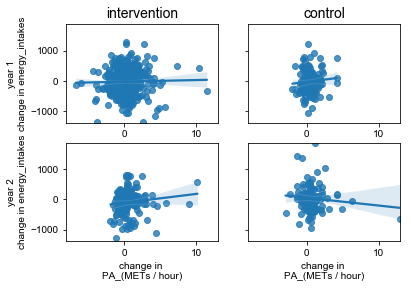

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,165,0.031,"[-0.12, 0.18]",0.001,-0.011,0.688,0.069,intervention,1,energy_intakes
spearman,143,0.146,"[-0.02, 0.3]",0.021,0.007,0.082,0.416,intervention,2,energy_intakes
spearman,132,0.052,"[-0.12, 0.22]",0.003,-0.013,0.555,0.091,control,1,energy_intakes
spearman,120,-0.041,"[-0.22, 0.14]",0.002,-0.015,0.655,0.073,control,2,energy_intakes


plot change in PA_(METs / hour) vs change in proteins  after 1 and 2 years :


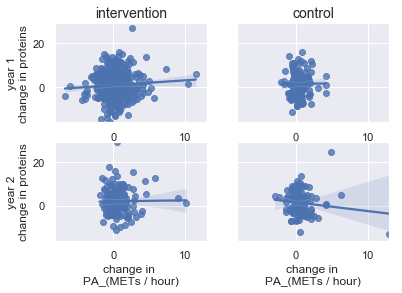

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,165,0.044,"[-0.11, 0.2]",0.002,-0.010,0.572,0.087,intervention,1,proteins
spearman,143,-0.024,"[-0.19, 0.14]",0.001,-0.014,0.779,0.059,intervention,2,proteins
spearman,132,0.029,"[-0.14, 0.2]",0.001,-0.015,0.743,0.062,control,1,proteins
spearman,120,-0.109,"[-0.28, 0.07]",0.012,-0.005,0.236,0.221,control,2,proteins


plot change in PA_(METs / hour) vs change in fat  after 1 and 2 years :


C:\Users\BMELAB\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


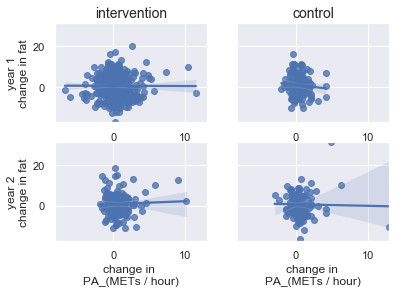

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,165,-0.104,"[-0.25, 0.05]",0.011,-0.001,0.182,0.267,intervention,1,fat
spearman,143,-0.079,"[-0.24, 0.09]",0.006,-0.008,0.351,0.154,intervention,2,fat
spearman,132,-0.057,"[-0.23, 0.12]",0.003,-0.012,0.519,0.099,control,1,fat
spearman,120,-0.122,"[-0.29, 0.06]",0.015,-0.002,0.186,0.264,control,2,fat


plot change in PA_(METs / hour) vs change in carb  after 1 and 2 years :


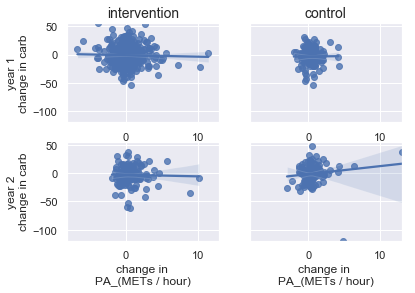

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,165,0.069,"[-0.09, 0.22]",0.005,-0.008,0.382,0.141,intervention,1,carb
spearman,143,0.048,"[-0.12, 0.21]",0.002,-0.012,0.570,0.088,intervention,2,carb
spearman,132,-0.044,"[-0.21, 0.13]",0.002,-0.014,0.618,0.079,control,1,carb
spearman,120,0.231,"[0.05, 0.39]",0.053,0.037,0.011,0.722,control,2,carb


plot change in PA_(METs / hour) vs change in weight  after 1 and 2 years :


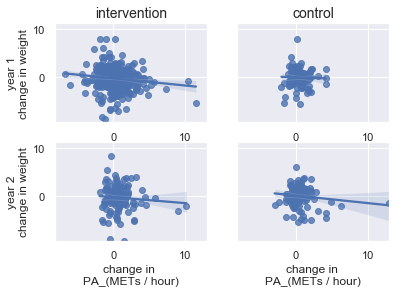

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,166,-0.148,"[-0.29, 0.0]",0.022,0.010,0.057,0.480,intervention,1,weight
spearman,143,-0.047,"[-0.21, 0.12]",0.002,-0.012,0.580,0.086,intervention,2,weight
spearman,132,-0.101,"[-0.27, 0.07]",0.010,-0.005,0.249,0.211,control,1,weight
spearman,120,-0.011,"[-0.19, 0.17]",0.000,-0.017,0.904,0.052,control,2,weight


plot change in PA_(METs / hour) vs change in waist_circumference  after 1 and 2 years :


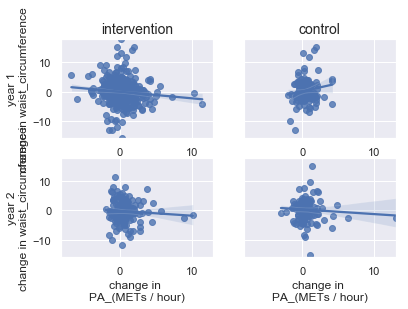

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,166,-0.183,"[-0.33, -0.03]",0.034,0.022,0.018,0.661,intervention,1,waist_circumference
spearman,143,-0.076,"[-0.24, 0.09]",0.006,-0.008,0.366,0.148,intervention,2,waist_circumference
spearman,132,0.056,"[-0.12, 0.22]",0.003,-0.012,0.527,0.097,control,1,waist_circumference
spearman,120,-0.019,"[-0.2, 0.16]",0.000,-0.017,0.838,0.055,control,2,waist_circumference


plot change in PA_(METs / hour) vs change in HR  after 1 and 2 years :


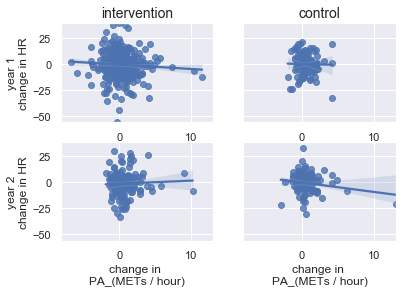

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,166,-0.215,"[-0.36, -0.06]",0.046,0.034,0.005,0.798,intervention,1,HR
spearman,143,0.003,"[-0.16, 0.17]",0.000,-0.014,0.969,0.050,intervention,2,HR
spearman,132,-0.050,"[-0.22, 0.12]",0.003,-0.013,0.566,0.089,control,1,HR
spearman,120,-0.146,"[-0.32, 0.03]",0.021,0.005,0.111,0.359,control,2,HR


plot change in PA_(METs / hour) vs change in bMAP  after 1 and 2 years :


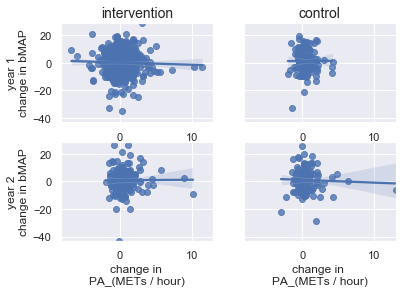

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,166,-0.033,"[-0.18, 0.12]",0.001,-0.011,0.672,0.071,intervention,1,bMAP
spearman,143,0.039,"[-0.13, 0.2]",0.002,-0.013,0.646,0.074,intervention,2,bMAP
spearman,132,-0.011,"[-0.18, 0.16]",0.000,-0.015,0.900,0.052,control,1,bMAP
spearman,120,0.010,"[-0.17, 0.19]",0.000,-0.017,0.917,0.051,control,2,bMAP


plot change in PA_(METs / hour) vs change in baPWV  after 1 and 2 years :


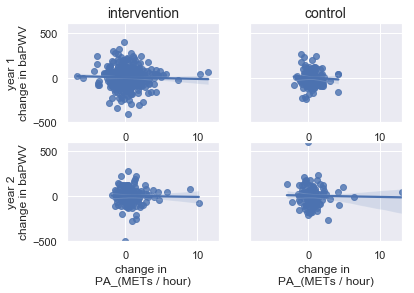

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,166,-0.067,"[-0.22, 0.09]",0.004,-0.008,0.391,0.138,intervention,1,baPWV
spearman,143,-0.067,"[-0.23, 0.1]",0.004,-0.010,0.427,0.125,intervention,2,baPWV
spearman,132,-0.042,"[-0.21, 0.13]",0.002,-0.014,0.631,0.077,control,1,baPWV
spearman,120,-0.071,"[-0.25, 0.11]",0.005,-0.012,0.444,0.120,control,2,baPWV


plot change in PA_(METs / hour) vs change in glucose  after 1 and 2 years :


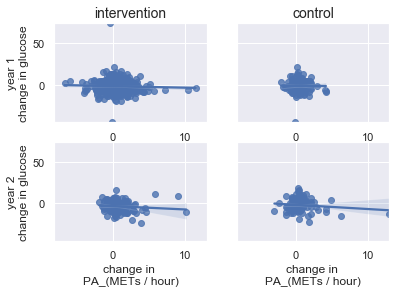

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,166,-0.129,"[-0.28, 0.02]",0.017,0.004,0.099,0.380,intervention,1,glucose
spearman,143,-0.182,"[-0.34, -0.02]",0.033,0.019,0.030,0.589,intervention,2,glucose
spearman,131,0.059,"[-0.11, 0.23]",0.003,-0.012,0.507,0.102,control,1,glucose
spearman,120,0.110,"[-0.07, 0.28]",0.012,-0.005,0.233,0.223,control,2,glucose


plot change in PA_(METs / hour) vs change in HbA1c  after 1 and 2 years :


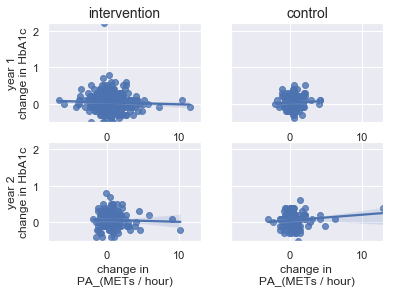

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,166,0.020,"[-0.13, 0.17]",0.000,-0.012,0.798,0.057,intervention,1,HbA1c
spearman,143,-0.010,"[-0.17, 0.15]",0.000,-0.014,0.903,0.052,intervention,2,HbA1c
spearman,131,0.034,"[-0.14, 0.2]",0.001,-0.014,0.696,0.068,control,1,HbA1c
spearman,120,0.042,"[-0.14, 0.22]",0.002,-0.015,0.647,0.074,control,2,HbA1c


plot change in PA_(METs / hour) vs change in TG_(neutral fat)  after 1 and 2 years :


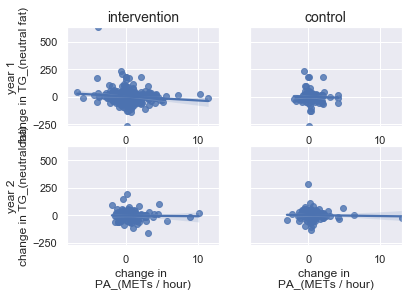

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,166,0.053,"[-0.1, 0.2]",0.003,-0.009,0.494,0.105,intervention,1,TG_(neutral fat)
spearman,143,-0.007,"[-0.17, 0.16]",0.000,-0.014,0.935,0.051,intervention,2,TG_(neutral fat)
spearman,131,-0.026,"[-0.2, 0.15]",0.001,-0.015,0.768,0.060,control,1,TG_(neutral fat)
spearman,120,-0.077,"[-0.25, 0.1]",0.006,-0.011,0.405,0.133,control,2,TG_(neutral fat)


plot change in PA_(METs / hour) vs change in tot_cholesterol  after 1 and 2 years :


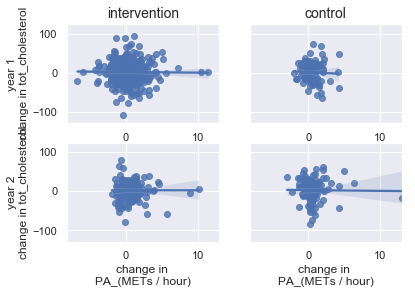

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,166,-0.058,"[-0.21, 0.1]",0.003,-0.009,0.459,0.115,intervention,1,tot_cholesterol
spearman,143,0.054,"[-0.11, 0.22]",0.003,-0.011,0.525,0.097,intervention,2,tot_cholesterol
spearman,131,-0.078,"[-0.25, 0.09]",0.006,-0.009,0.377,0.143,control,1,tot_cholesterol
spearman,120,-0.014,"[-0.19, 0.17]",0.000,-0.017,0.883,0.052,control,2,tot_cholesterol


plot change in PA_(METs / hour) vs change in trunk_flex  after 1 and 2 years :


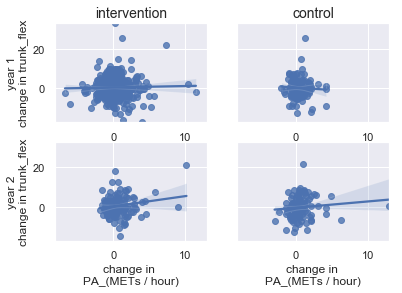

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,164,0.026,"[-0.13, 0.18]",0.001,-0.012,0.743,0.062,intervention,1,trunk_flex
spearman,141,0.038,"[-0.13, 0.2]",0.001,-0.013,0.652,0.074,intervention,2,trunk_flex
spearman,132,-0.029,"[-0.2, 0.14]",0.001,-0.015,0.742,0.062,control,1,trunk_flex
spearman,120,0.190,"[0.01, 0.36]",0.036,0.020,0.038,0.551,control,2,trunk_flex


plot change in PA_(METs / hour) vs change in vertical_jump  after 1 and 2 years :


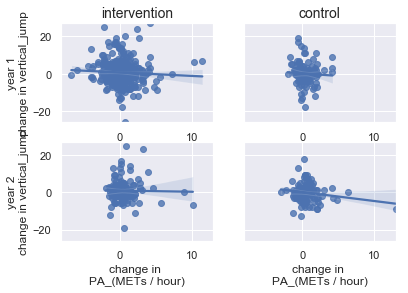

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,155,-0.042,"[-0.2, 0.12]",0.002,-0.011,0.608,0.081,intervention,1,vertical_jump
spearman,137,-0.032,"[-0.2, 0.14]",0.001,-0.014,0.710,0.066,intervention,2,vertical_jump
spearman,129,-0.089,"[-0.26, 0.09]",0.008,-0.008,0.318,0.170,control,1,vertical_jump
spearman,118,-0.044,"[-0.22, 0.14]",0.002,-0.015,0.639,0.075,control,2,vertical_jump


plot change in PA_(METs / hour) vs change in VO2max_w  after 1 and 2 years :


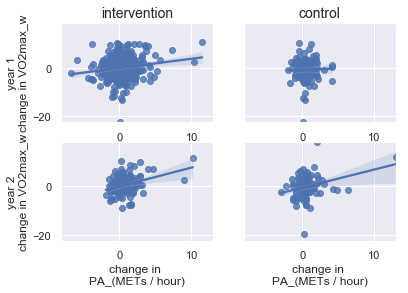

,n,r,CI95%,r2,adj_r2,p-val,power,group,change at year,variable
spearman,154,0.145,"[-0.01, 0.3]",0.021,0.008,0.072,0.439,intervention,1,VO2max_w
spearman,126,0.228,"[0.06, 0.39]",0.052,0.037,0.010,0.733,intervention,2,VO2max_w
spearman,125,0.072,"[-0.11, 0.24]",0.005,-0.011,0.425,0.125,control,1,VO2max_w
spearman,106,0.221,"[0.03, 0.39]",0.049,0.030,0.023,0.628,control,2,VO2max_w


-
-


In [7]:
# Run the correlation
ind_var = 'PA_(METs / hour)'

param_for_correlation_tests = pd.concat([Nutr_param, Body_param,Vasc_param,Blood_param,Fitness_param])

%matplotlib inline

data_set_corr = []
corr_res=[]
# 
for year in period:
    data_set_corr.append(data_set[int(year)].set_index('subject_ID'))

# build a dataframe of difference between baseline and year 1 and baseline and year 2 for the independant variable only.
diff_ind_var = []
for year in period[1:]:
    change = pd.merge((data_set_corr[int(year)][ind_var]-data_set_corr[0][ind_var]).dropna(),data_set_corr[0]['group'],left_index=True, right_index=True)
    #d
    diff_ind_var.append(change)
    
    
# analysis.    
for dep_var in param_for_correlation_tests:
    diff_dep_var = []
    diff = []
    liii= []
    for year in period[1:]:
        diff_dep_var.append((data_set_corr[int(year)][dep_var]-data_set_corr[int(0)][dep_var]).dropna())
        diff.append(pd.merge(diff_ind_var[int(year)-1],diff_dep_var[int(year)-1],left_index=True,right_index=True))
    print('plot change in', ind_var, 'vs change in', dep_var, ' after 1 and 2 years :')
    CorrPlot()
    liii = CorrStats()
    display(liii)
    corr_res.append(liii)
corr_res = pd.concat(corr_res)[['group','change at year', 'variable', 'p-val']]
#
print('-')
print('-')


In [8]:
## correction coefficient

CORRECTION = corr_res


#
# 

Nutr=Nutr_param
Body=Body_param
Vasc = Vasc_param
Blood = Blood_param
Fitness = Fitness_param
# Bonferroni correction applied within in each category.
corr_res['Bonf, each gr, each cat'] = np.where(corr_res['variable'].isin(Nutr), (corr_res['p-val']*len(Nutr)),
                                    np.where(corr_res['variable'].isin(Body), (corr_res['p-val']*len(Body)),
                                np.where(corr_res['variable'].isin(Vasc), (corr_res['p-val']*len(Vasc)), 
                                np.where(corr_res['variable'].isin(Blood), (corr_res['p-val']*len(Blood)), 
                                np.where(corr_res['variable'].isin(Fitness), (corr_res['p-val']*len(Vasc)), 'error')))))
corr_res['Bonf, each gr, each cat'] = corr_res['Bonf, each gr, each cat'].astype('float64')
corr_res['reject ?'] = np.where(corr_res['Bonf, each gr, each cat'] < 0.05, True, False)

# 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(corr_res)



print('Any significant AFTER the bonferroni correction being applied for each group in each category of variables?')
print(any(CORRECTION['reject ?']))

,group,change at year,variable,p-val,"Bonf, each gr, each cat",reject ?
spearman,intervention,1,energy_intakes,0.688,2.752,False
spearman,intervention,2,energy_intakes,0.082,0.328,False
spearman,control,1,energy_intakes,0.555,2.220,False
spearman,control,2,energy_intakes,0.655,2.620,False
spearman,intervention,1,proteins,0.572,2.288,False
spearman,intervention,2,proteins,0.779,3.116,False
spearman,control,1,proteins,0.743,2.972,False
spearman,control,2,proteins,0.236,0.944,False
spearman,intervention,1,fat,0.182,0.728,False
spearman,intervention,2,fat,0.351,1.404,False


Any significant AFTER the bonferroni correction being applied for each group in each category of variables?
True


In [9]:
print('The whole analysis has been successfully run')


The whole analysis has been successfully run
